### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [15]:
p

In [16]:
sunspots = sm.datasets.sunspots.load_pandas()
air = pd.read_csv('data/AirPassengers.csv')

In [17]:
air.head()
# air.info()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
air = air.set_index(pd.to_datetime(air['Month'], format = '%Y-%m')).drop(columns = ['Month'])
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
y_hist = air.loc[:, '#Passengers']
h = len(y_hist)


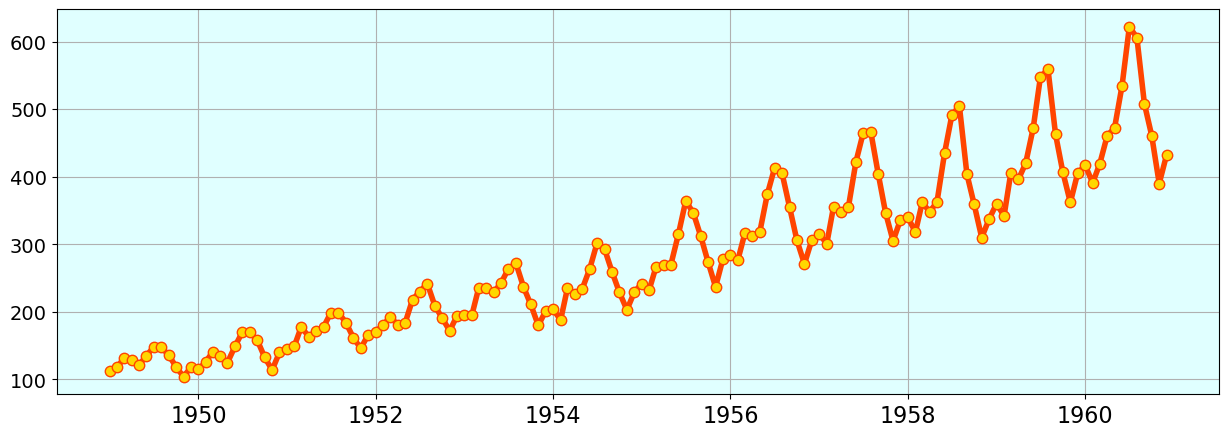

In [20]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('lightcyan')
plt.plot(y_hist,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')
plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
# plt.xlim((6000, 19000))
myylim = plt.ylim()

In [21]:
period = 11
res = seasonal_decompose(y_hist, period = period, extrapolate_trend = True)
print(res.trend.size)
print(res.seasonal.size)
print(res.trend)
print(res.seasonal)

144
144
Month
1949-01-01    124.727273
1949-02-01    125.272727
1949-03-01    125.818182
1949-04-01    126.363636
1949-05-01    126.909091
                 ...    
1960-08-01    477.454545
1960-09-01    476.090909
1960-10-01    474.727273
1960-11-01    473.363636
1960-12-01    472.000000
Name: trend, Length: 144, dtype: float64
Month
1949-01-01    -7.662156
1949-02-01    -1.803015
1949-03-01     2.106076
1949-04-01     8.770411
1949-05-01    10.413768
                ...    
1960-08-01     1.462719
1960-09-01    -8.593225
1960-10-01   -13.040777
1960-11-01   -12.851966
1960-12-01    -7.662156
Name: seasonal, Length: 144, dtype: float64


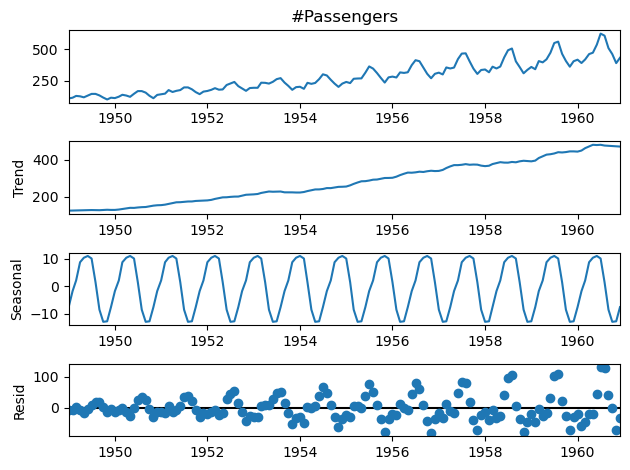

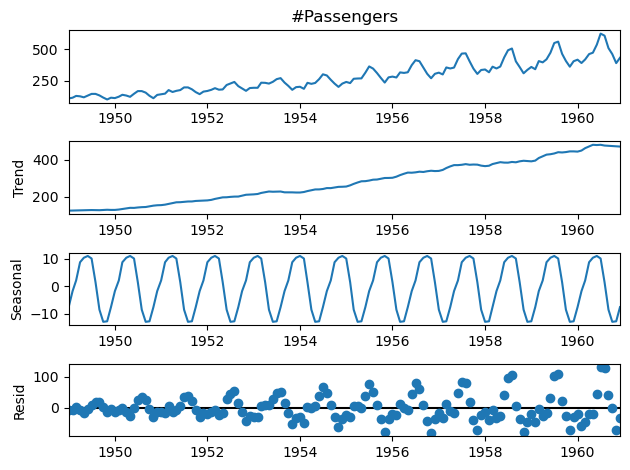

In [38]:
res.plot()

### Doing it manually

In [46]:
# create the df
air_df = y_hist.to_frame()
# calculate the trend
air_df['trend'] = air_df['#Passengers'].rolling(window = 13, center = True).mean()
# detrend
air_df['detrended'] = air_df['#Passengers'] - air_df['trend']
# calculate seasonal
air_df.index = pd.to_datetime(air_df.index)
air_df['month'] = air_df.index.month
air_df['seasonality'] = air_df.groupby('month')['detrended'].transform('mean')
# get the residuals
air_df['resid'] = air_df['detrended'] - air_df['seasonality']
#display
air_df.head(15)

""" notes
we have used a rolling window of length 13 (12 months + 1 to make it an odd number for the centered average).
we used a very handy method called transform to calculate the average values per group. We used it to avoid the need of creating a separate DataFrame with the aggregated values and then joining it back to the original DF. You can read more about it (and some other useful pandas functionalities) here.
we displayed the first 15 rows so we can see that the aggregated seasonal component is calculated correctly for all the months (including the ones that have missing values for the detrended series).

,#Passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


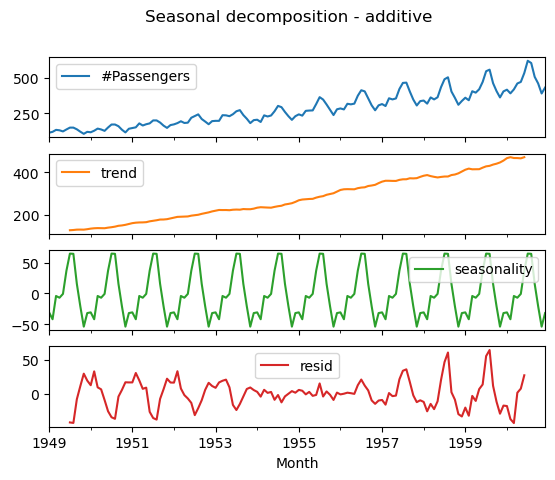

In [47]:
# plot the decomposition...results very similar to Statsmodels

(
    air_df
    .loc[:, ["#Passengers", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
);

Text(0, 0.5, 'Passengers Trend')

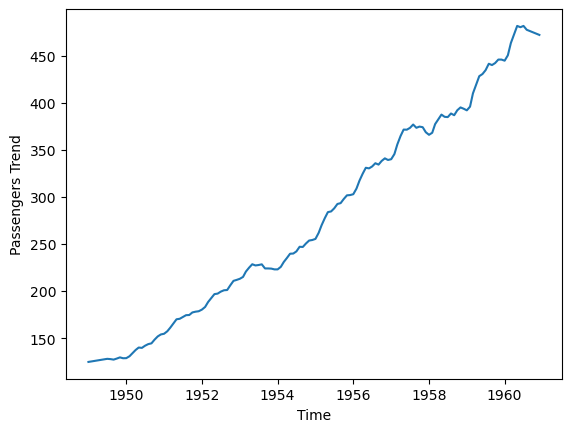

In [22]:
plt.plot(res.trend)
plt.xlabel('Time')
plt.ylabel('Passengers Trend')

Text(0, 0.5, 'Passengers Seasonal')

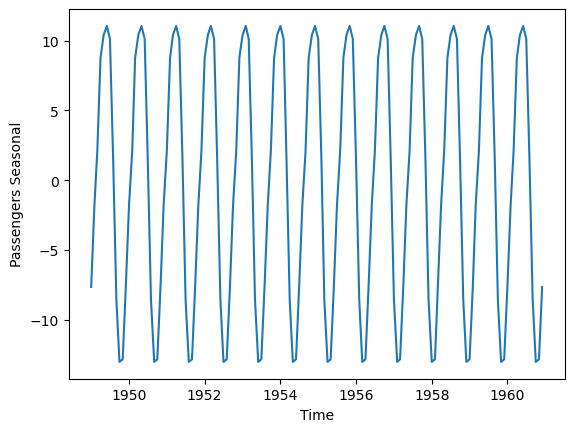

In [23]:
plt.plot(res.seasonal)
plt.xlabel('Time')
plt.ylabel('Passengers Seasonal')

In [24]:
sunspots_df = pd.DataFrame(data = sunspots.data)
sunspots_df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [31]:
sunspots_df = sunspots_df.set_index(pd.to_datetime(sunspots_df['YEAR'], format = '%Y')).drop(columns = ['YEAR'])
sunspots_df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


In [32]:
y2_hist = sunspots_df.loc[:, 'SUNACTIVITY']
h = len(y_hist)


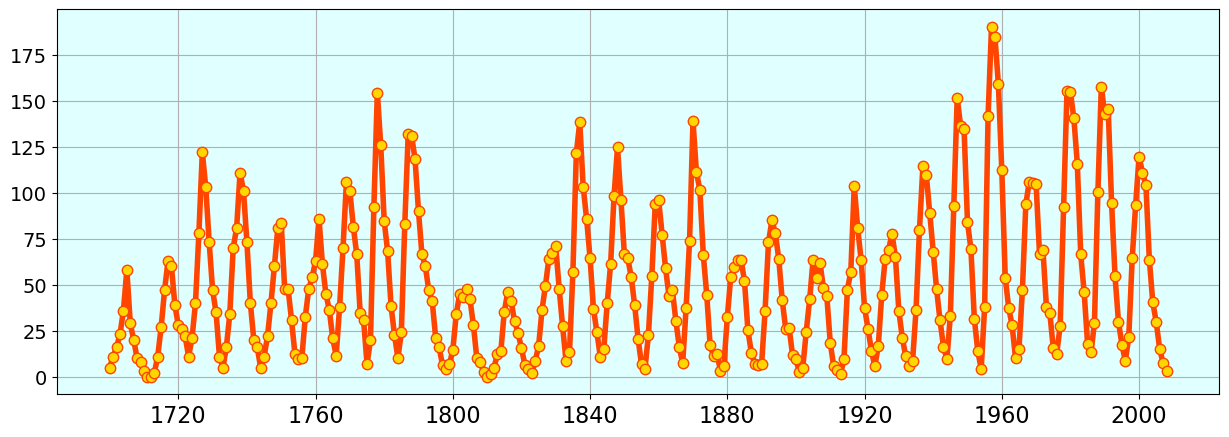

In [33]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('lightcyan')
plt.plot(y2_hist,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')
plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
# plt.xlim((6000, 19000))
myylim = plt.ylim()

In [34]:
period2 = 30
res2 = seasonal_decompose(y2_hist, period = period2, extrapolate_trend = True)
print(res2.trend.size)
print(res2.seasonal.size)
print(res2.trend)
print(res2.seasonal)

309
309
YEAR
1700-01-01    17.266667
1701-01-01    18.366667
1702-01-01    19.466667
1703-01-01    20.566667
1704-01-01    21.666667
                ...    
2004-01-01    71.963333
2005-01-01    71.673333
2006-01-01    71.383333
2007-01-01    71.093333
2008-01-01    70.803333
Name: trend, Length: 309, dtype: float64
YEAR
1700-01-01     8.247493
1701-01-01     1.411281
1702-01-01    -5.978719
1703-01-01   -17.807810
1704-01-01   -20.649325
                ...    
2004-01-01   -20.649325
2005-01-01   -19.303568
2006-01-01   -16.614022
2007-01-01    -3.233113
2008-01-01     6.690372
Name: seasonal, Length: 309, dtype: float64


In [37]:
print(type(res2))

<class 'statsmodels.tsa.seasonal.DecomposeResult'>


Text(0, 0.5, 'Spots Trend')

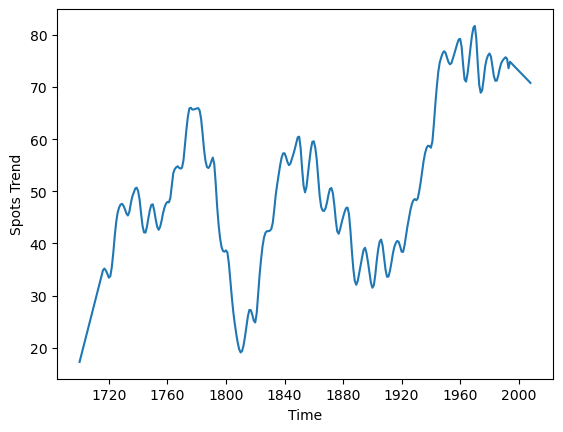

In [35]:
plt.plot(res2.trend)
plt.xlabel('Time')
plt.ylabel('Spots Trend')

Text(0, 0.5, 'Spots Seasonal')

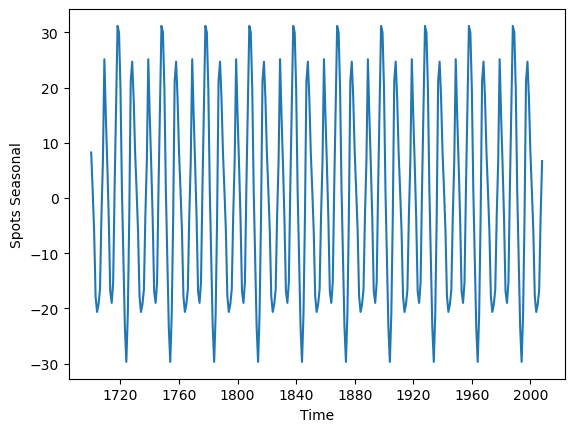

In [36]:
plt.plot(res2.seasonal)
plt.xlabel('Time')
plt.ylabel('Spots Seasonal')